# **Intro**

This notebook is a *hello world* of machine learning: predictions made based on csv file. In this case the prediction made is of flights regarding potential delays ((which happens a lot)). The data used for the model was found online it was collected accross different american aerports in 2016.

#### This solution regroups 3 parts 
* download the clean the data using **pandas**
* create and train de model using **scikitlearn**
* visualize the results of our model using **matplotlib**

In [1]:
!curl https://topcs.blob.core.windows.net/public/FlightData.csv -o flightdata.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1552k  100 1552k    0     0  2199k      0 --:--:-- --:--:-- --:--:-- 2196k


In [2]:
import pandas as pd #importing the needed library
df = pd.read_csv('flightdata.csv')
df.head(5)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST_AIRPORT_ID,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DEL15,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,14747,SEA,1905,1907.0,2.0,0.0,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,13487,MSP,1345,1344.0,-1.0,0.0,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,14747,SEA,940,942.0,2.0,0.0,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,13487,MSP,819,820.0,1.0,0.0,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,11433,DTW,2300,2256.0,-4.0,0.0,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [3]:
df.shape 
# (x,y) means that the data in our csv file are spread over 11231 lines and 26 columns

(11231, 26)

In [4]:
df.isnull().values.any() # checking if we have null values in there ((empty cells))

True

In [5]:
df.isnull().sum() #locate de null valuses by columns

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [6]:
df=df.drop('Unnamed: 25',axis=1) #the last column is ALL empty must be a mistake so we drop it
df.shape

(11231, 25)

In [7]:
df = df[["MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_DEP_TIME", "ARR_DEL15"]] #picking the needed columns and leaving the rest
df.isnull().sum() 

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_DEP_TIME      0
ARR_DEL15       188
dtype: int64

In [8]:
df[df.isnull().values.any(axis=1)].head(5) #display the lines with a null value

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,NaN
179,1,10,7,MSP,DTW,1348,NaN
184,1,10,7,MSP,DTW,625,NaN
210,1,10,7,DTW,MSP,1200,NaN
478,1,22,5,SEA,JFK,2305,NaN


In [9]:
df=df.fillna({'ARR_DEL15':1}) #filling in the null values 
df.iloc[177:185] #display again the previous lines

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,1.0
178,1,9,6,DTW,JFK,1527,0.0
179,1,10,7,MSP,DTW,1348,1.0
180,1,10,7,DTW,MSP,1540,0.0
181,1,10,7,JFK,ATL,1325,0.0
182,1,10,7,JFK,ATL,610,0.0
183,1,10,7,JFK,SEA,1615,0.0
184,1,10,7,MSP,DTW,625,1.0


In [10]:
import math
for index, row in df.iterrows():
    df.loc[index,'CRS_DEP_TIME']=math.floor(row['CRS_DEP_TIME']/100) #transforming time from military 4 digits representation to regulat 24h representation
df.head(5) 
    

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,19,0.0
1,1,1,5,DTW,MSP,13,0.0
2,1,1,5,ATL,SEA,9,0.0
3,1,1,5,SEA,MSP,8,0.0
4,1,1,5,SEA,DTW,23,0.0


In [11]:
df = pd.get_dummies(df, columns=['ORIGIN', 'DEST']) #split the aerports names into diffrent columns to use one hot encoding
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,19,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,13,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,9,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,8,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,23,0.0,0,0,0,0,1,0,1,0,0,0


# Create and train model


In [12]:
from sklearn.model_selection import train_test_split #spliting data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(df.drop('ARR_DEL15', axis=1), df['ARR_DEL15'], test_size=0.2, random_state=42)



In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [14]:
predict=model.predict(test_x)
model.score(test_x,test_y)

0.8642634623943035

althought the score is high -86%- it does not mean that our model is rigorous cause the score is biased by the high number of on-time flights the roc_auc_score in the other hand gives us a more precised view of our model's results

In [15]:
from sklearn.metrics import roc_auc_score
probabilities= model.predict_proba(test_x)

In [16]:
roc_auc_score(test_y,probabilities[:,1])

0.7014819895830565

The difference between the score -86%- and the roc_auc_score -67%- is explained by the confusion matrix that helps us locate the faillures

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y,predict)

array([[1903,   33],
       [ 272,   39]])

In [18]:
from sklearn.metrics import precision_score
train_predictions = model.predict(train_x)
precision_score(train_y,train_predictions)


1.0

In [19]:
from sklearn.metrics import recall_score
recall_score(train_y,train_predictions)

0.9992012779552716

### Let's see our model's performance

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set

<function seaborn.rcmod.set>

Text(0, 0.5, 'True Positive Rate')

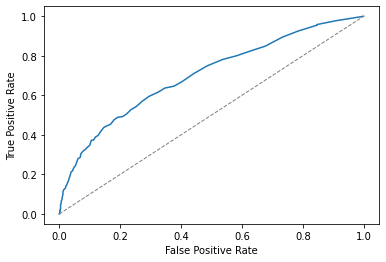

In [21]:
from sklearn.metrics import roc_curve

fpr,tpr,_= roc_curve(test_y,probabilities[:,1])
plt.plot(fpr,tpr)

plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Let's play around with the model and try it out 

In [22]:
#regrouping everything in a function
def predict_delay(departure_date_time, origin, destination):
    from datetime import datetime

    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour

    origin = origin.upper()
    destination = destination.upper()

    input = [{'MONTH': month,
              'DAY': day,
              'DAY_OF_WEEK': day_of_week,
              'CRS_DEP_TIME': hour,
              'ORIGIN_ATL': 1 if origin == 'ATL' else 0,
              'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
              'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
              'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
              'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
              'DEST_ATL': 1 if destination == 'ATL' else 0,
              'DEST_DTW': 1 if destination == 'DTW' else 0,
              'DEST_JFK': 1 if destination == 'JFK' else 0,
              'DEST_MSP': 1 if destination == 'MSP' else 0,
              'DEST_SEA': 1 if destination == 'SEA' else 0 }]
      #call the model to make the prediction
    return model.predict_proba(pd.DataFrame(input))[0][0]

In [23]:
predict_delay('20/12/2018 20:00:00', 'SEA', 'JFK')

0.89

(0.0, 1.0)

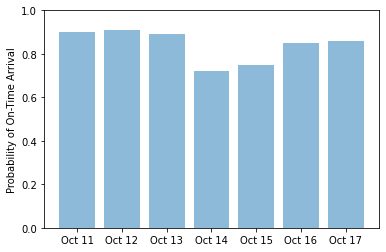

In [24]:
import numpy as np #study chances to get a delay based on the day of the month

labels = ('Oct 11', 'Oct 12', 'Oct 13', 'Oct 14', 'Oct 15', 'Oct 16', 'Oct 17')
values = (predict_delay('11/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('12/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('13/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('14/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('15/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('16/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('17/10/2018 21:45:00', 'JFK', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))

(0.0, 1.0)

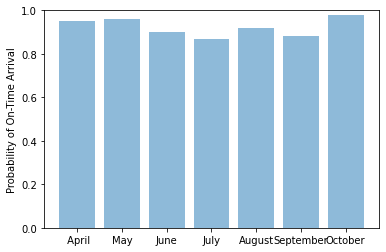

In [25]:
import numpy as np

labels = (' April', 'May', 'June', 'July', 'August', 'September', 'October')
values = (predict_delay('10/04/2018 13:00:00', 'JFK', 'ATL'),
          predict_delay('11/05/2018 13:00:00', 'JFK', 'ATL'),
          predict_delay('12/06/2018 13:00:00', 'JFK', 'ATL'),
          predict_delay('13/07/2018 13:00:00', 'JFK', 'ATL'),
          predict_delay('14/08/2018 13:00:00', 'JFK', 'ATL'),
          predict_delay('15/09/2018 13:00:00', 'JFK', 'ATL'),
          predict_delay('16/10/2018 13:00:00', 'JFK', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))

(0.0, 1.0)

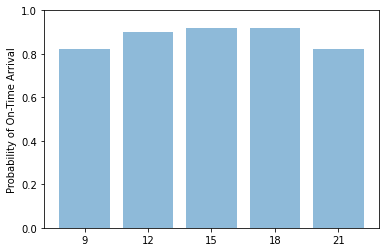

In [26]:
import numpy as np #compare delay chances based on time 

labels = ('9', '12', '15', '18', '21')
values = (predict_delay('30/01/2018 09:00:00', 'JFK', 'ATL'),
          predict_delay('30/01/2018 12:00:00', 'JFK', 'ATL'),
          predict_delay('30/01/2018 15:00:00', 'JFK', 'ATL'),
          predict_delay('30/01/2018 18:00:00', 'JFK', 'ATL'),
          predict_delay('30/01/2018 21:00:00', 'JFK', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))